In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv("full_dataset.csv", index_col=0)
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840,guariba,SP


In [96]:
df.shape

(115609, 40)

In [97]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')

In [98]:
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])

In [99]:
df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                        int64
payment_type                             object
payment_installments                    

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115609 non-null  object        
 1   customer_id                    115609 non-null  object        
 2   order_status                   115609 non-null  object        
 3   order_purchase_timestamp       115609 non-null  datetime64[ns]
 4   order_approved_at              115595 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 6   order_delivered_customer_date  113209 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115609 non-null  datetime64[ns]
 8   customer_unique_id             115609 non-null  object        
 9   customer_zip_code_prefix       115609 non-null  int64         
 10  customer_city                  115609 non-null  object        
 11  custo

In [101]:
df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,order_item_id,shipping_limit_date,price,freight_value,...,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,115609,115595,114414,113209,115609,115609.000000,115609.000000,115609,115609.000000,115609.000000,...,115609,115609,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000
mean,2017-12-31 04:27:50.933336064,2017-12-31 15:53:50.673195264,2018-01-04 05:48:14.275464448,2018-01-13 17:20:24.922400256,2018-01-24 01:15:13.973825792,35061.537597,1.194535,2018-01-06 19:59:37.125777408,120.619850,20.056880,...,2018-01-12 17:48:57.259209728,2018-01-15 21:25:08.146969856,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,24515.713958
min,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,1003.000000,1.000000,2016-09-19 00:15:34,0.850000,0.000000,...,2016-10-15 00:00:00,2016-10-16 03:20:17,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,2017-09-12 11:14:11,2017-09-12 18:04:35.500000,2017-09-15 17:37:49,2017-09-25 18:12:25,2017-10-03 00:00:00,11310.000000,1.000000,2017-09-19 08:24:41,39.900000,13.080000,...,2017-09-23 00:00:00,2017-09-26 23:34:04,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,2018-01-19 03:30:43,2018-01-19 14:57:12,2018-01-23 23:48:29,2018-02-02 01:42:36,2018-02-15 00:00:00,24241.000000,1.000000,2018-01-25 19:37:12,74.900000,16.320000,...,2018-02-02 00:00:00,2018-02-05 09:08:49,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000
75%,2018-05-04 15:56:31,2018-05-05 02:13:51,2018-05-08 13:01:00,2018-05-15 19:54:56,2018-05-28 00:00:00,58745.000000,1.000000,2018-05-10 13:50:38,134.900000,21.210000,...,2018-05-16 00:00:00,2018-05-20 12:43:40,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28605.000000
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,99980.000000,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,...,2018-08-31 00:00:00,2018-10-29 12:27:35,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000
std,NaN,NaN,NaN,NaN,NaN,29841.671732,0.685926,NaN,182.653476,15.836184,...,NaN,NaN,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,27636.640968


### Flag the late delivery

In [102]:
df[['order_delivered_customer_date', 'order_estimated_delivery_date']]

,order_delivered_customer_date,order_estimated_delivery_date
0,2017-10-10 21:25:13,2017-10-18
1,2017-10-10 21:25:13,2017-10-18
2,2017-10-10 21:25:13,2017-10-18
3,2018-08-07 15:27:45,2018-08-13
4,2018-08-17 18:06:29,2018-09-04
...,...,...
115604,2018-02-28 17:37:56,2018-03-02
115605,2017-09-21 11:24:17,2017-09-27
115606,2018-01-25 23:32:54,2018-02-15
115607,2018-01-25 23:32:54,2018-02-15


In [103]:
df['Late_delivery'] = df['order_delivered_customer_date'] > df['order_estimated_delivery_date']

In [104]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,Late_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP,False
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP,False
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP,False
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1.0,400.0,19.0,13.0,19.0,perfumery,31570,belo horizonte,SP,False
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,420.0,24.0,19.0,21.0,auto,14840,guariba,SP,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,4.0,4950.0,40.0,10.0,40.0,baby,17602,tupa,SP,False
115605,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,2.0,13300.0,32.0,90.0,22.0,home_appliances_2,8290,sao paulo,SP,False
115606,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,1.0,6550.0,20.0,20.0,20.0,computers_accessories,37175,ilicinea,MG,False
115607,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,1.0,6550.0,20.0,20.0,20.0,computers_accessories,37175,ilicinea,MG,False


### Drop unnecessary columns

In [105]:
unness_cols = ['order_id', 'customer_id', 'customer_unique_id', 'order_item_id','product_id','seller_id',
'review_id',
'review_score',
'review_comment_title',
'review_comment_message',
'review_creation_date',
'review_answer_timestamp',
'product_category_name',
'product_name_lenght',
'product_description_lenght',
'product_photos_qty',
'product_weight_g',
'product_length_cm',
'product_height_cm',
'product_width_cm',
'customer_zip_code_prefix',
'customer_city',
'seller_zip_code_prefix']

In [106]:
df.drop(columns= unness_cols, inplace= True)

### Handling the null and duplicated values

In [107]:
df.shape

(115609, 18)

In [108]:
df.isnull().sum()

order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1195
order_delivered_customer_date    2400
order_estimated_delivery_date       0
customer_state                      0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name_english       0
seller_city                         0
seller_state                        0
Late_delivery                       0
dtype: int64

In [109]:
df.dropna(inplace = True)

In [110]:
df.duplicated().sum()

11554

In [111]:
df.drop_duplicates(inplace= True)

In [112]:
df.reset_index(inplace= True, drop= True)

In [113]:
df['Late_delivery'].value_counts()

Late_delivery
False    93705
True      7935
Name: count, dtype: int64

In [114]:
df.columns

Index(['order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_state',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name_english', 'seller_city', 'seller_state',
       'Late_delivery'],
      dtype='object')

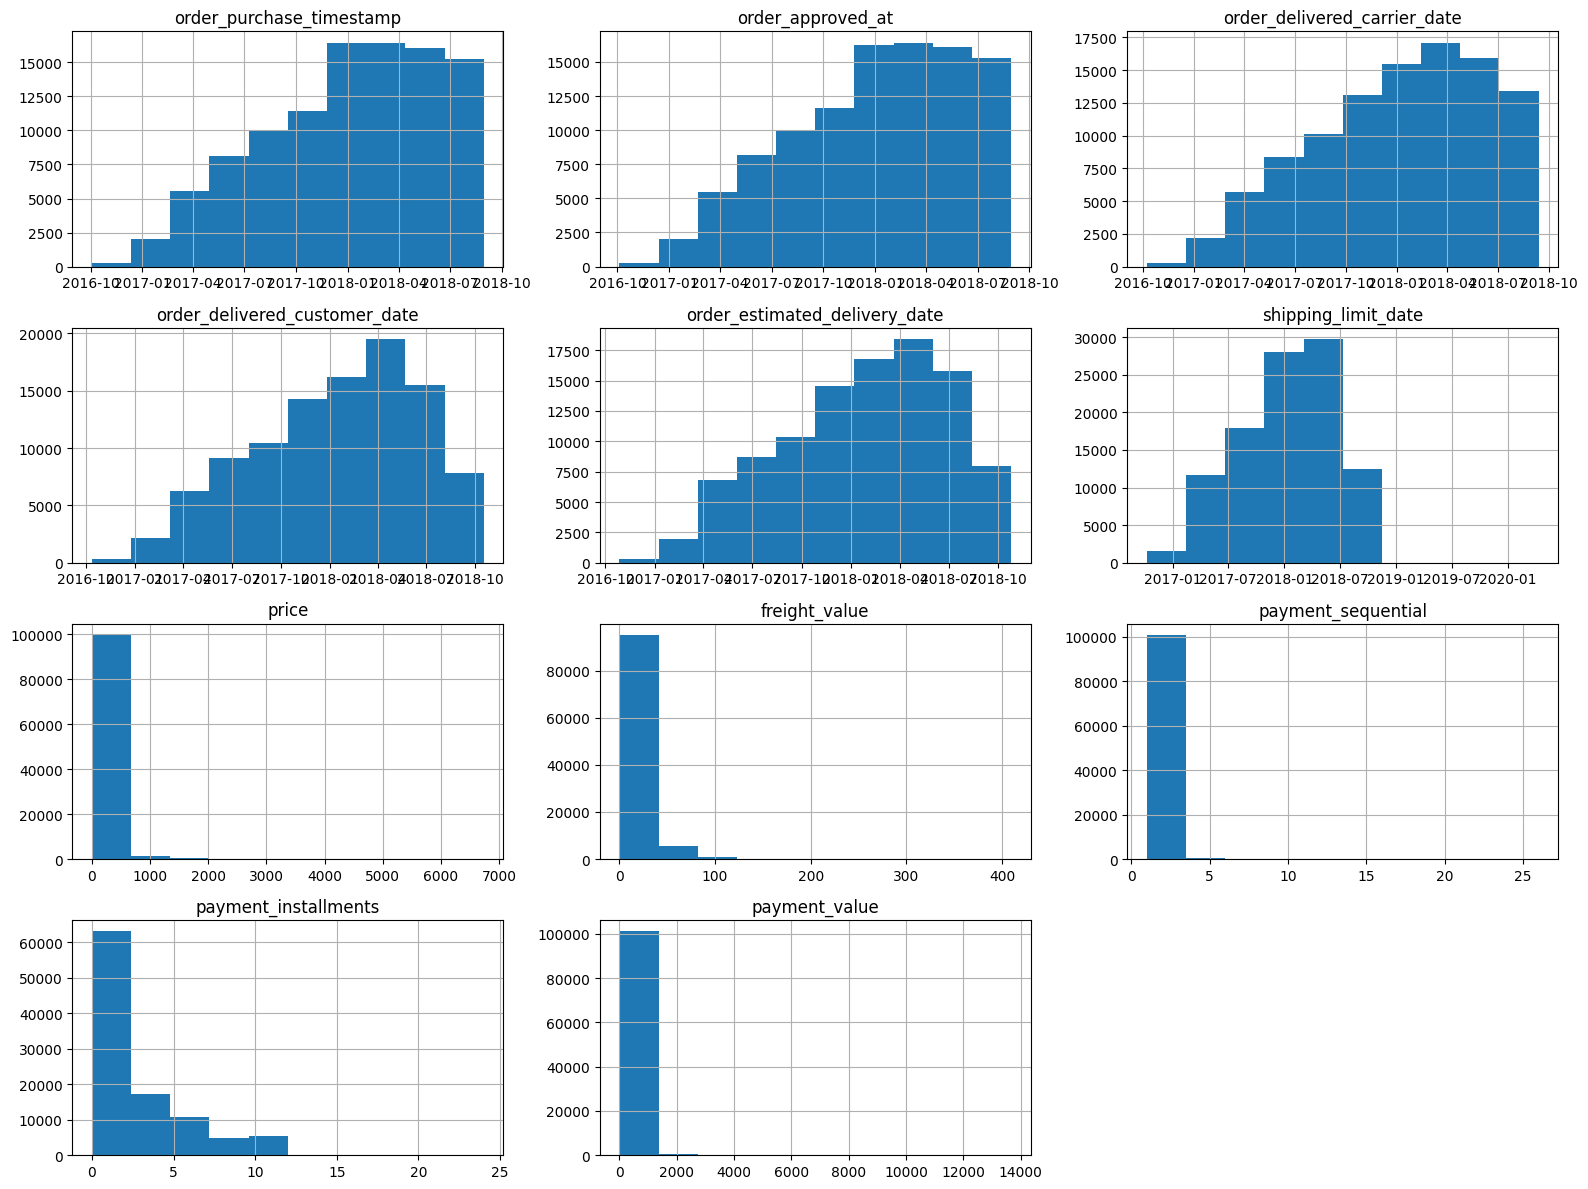

In [115]:
df.hist( figsize=(16,12))
plt.xticks(rotation=45)
plt.tight_layout()

In [116]:
df['order_estimated_delivery_date'].max()

Timestamp('2018-10-25 00:00:00')

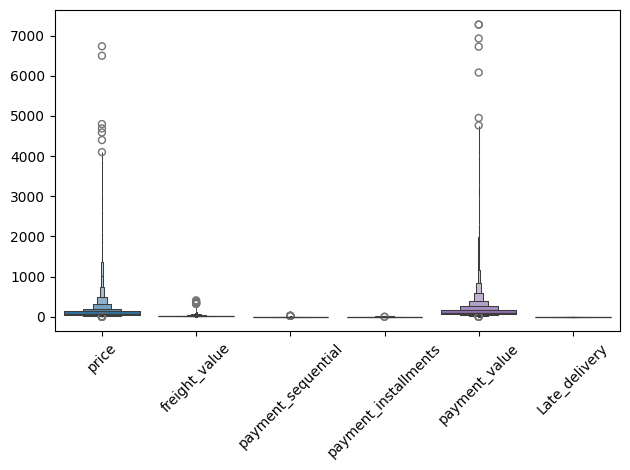

In [122]:
sns.boxenplot(df)
plt.xticks(rotation= 45)
plt.tight_layout()

In [118]:
# we have only one outlier which is in the payment_value
df['payment_value'].sort_values(ascending= False)

13697    13664.08
67978     7274.88
22693     6929.31
3601      6726.66
33138     6081.54
           ...   
73173        0.01
33100        0.00
436          0.00
87621        0.00
99108        0.00
Name: payment_value, Length: 101640, dtype: float64

In [119]:
df.loc[13697, 'payment_value'] = 7274.88

In [120]:
df.iloc[13697]

order_status                               delivered
order_purchase_timestamp         2017-09-29 15:24:52
order_approved_at                2017-10-02 15:28:20
order_delivered_carrier_date     2017-10-10 15:43:17
order_delivered_customer_date    2017-10-17 18:22:29
order_estimated_delivery_date    2017-10-23 00:00:00
customer_state                                    RJ
shipping_limit_date              2017-10-06 15:28:20
price                                         1680.0
freight_value                                  28.01
payment_sequential                                 1
payment_type                             credit_card
payment_installments                               1
payment_value                                7274.88
product_category_name_english        fixed_telephony
seller_city                                sao paulo
seller_state                                      SP
Late_delivery                                  False
Name: 13697, dtype: object

In [121]:
df

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_state,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english,seller_city,seller_state,Late_delivery
0,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,SP,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12,housewares,maua,SP,False
1,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,SP,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00,housewares,maua,SP,False
2,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,SP,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59,housewares,maua,SP,False
3,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,BA,2018-07-30 03:24:27,118.70,22.76,1,boleto,1,141.46,perfumery,belo horizonte,SP,False
4,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,GO,2018-08-13 08:55:23,159.90,19.22,1,credit_card,3,179.12,auto,guariba,SP,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101635,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,SP,2017-03-15 09:54:05,72.00,13.08,1,credit_card,3,85.08,health_beauty,braganca paulista,SP,False
101636,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,SP,2018-02-12 13:10:37,174.90,20.10,1,credit_card,3,195.00,baby,tupa,SP,False
101637,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,BA,2017-09-05 15:04:16,205.99,65.02,1,credit_card,5,271.01,home_appliances_2,sao paulo,SP,False
101638,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,RJ,2018-01-12 21:36:21,179.99,40.59,1,credit_card,4,441.16,computers_accessories,ilicinea,MG,False
